<a href="https://colab.research.google.com/github/ailab-nda/NLP/blob/main/wav2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ライブラリのイストール

In [1]:
! pip install transformers datasets librosa

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 287 kB 25.5 MB/s 
     |████████████████████████████████| 56 kB 3.0 MB/s 
     |████████████████████████████████| 596 kB 30.7 MB/s 
     |████████████████████████████████| 895 kB 29.8 MB/s 
     |████████████████████████████████| 3.3 MB 36.5 MB/s 
     |████████████████████████████████| 125 kB 36.7 MB/s 
     |████████████████████████████████| 1.3 MB 36.4 MB/s 
     |████████████████████████████████| 243 kB 34.9 MB/s 
     |████████████████████████████████| 271 kB 48.2 MB/s 
     |████████████████████████████████| 160 kB 50.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


ライブラリのインポート

In [2]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import display, Audio
import librosa.display
import numpy as np

import torch
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
from datasets import load_dataset
import soundfile as sf

モデルと前処理

In [3]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

Downloading:   0%|          | 0.00/159 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/291 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/163 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/360M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


抽出用関数

In [4]:
def map_to_array(batch):
    speech, sr_db = sf.read(batch["file"])
    batch["speech"] = speech
    batch['sr_db'] = sr_db
    return batch

ダミーデータの取得

In [5]:
ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")
ds = ds.map(map_to_array)

Downloading:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

Dataset librispeech_asr downloaded and prepared to /root/.cache/huggingface/datasets/patrickvonplaten___librispeech_asr)/clean/2.1.0/f2c70a4d03ab4410954901bde48c54b85ca1b7f9bf7d616e7e2a72b5ee6ddbfc. Subsequent calls will reuse this data.


  0%|          | 0/73 [00:00<?, ?ex/s]

音声データの確認

In [16]:
len(ds['speech'])

73

55


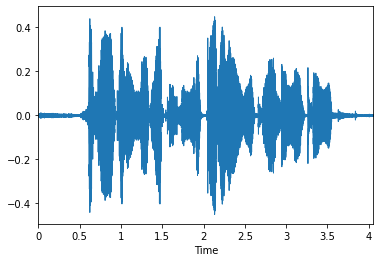

In [22]:
import random
id = random.randint(0, len(ds['speech']))
print(id)
librosa.display.waveplot(np.array(ds['speech'][id]), sr=ds['sr_db'][id])
plt.show()
display(Audio(np.array(ds['speech'][id]), rate=ds['sr_db'][id]))

音声認識

In [23]:
input_values = processor(ds["speech"][id], return_tensors="pt").input_values  # Batch size 1
logits = model(input_values).logits
predicted_ids = torch.argmax(logits, dim=-1)

transcription = processor.decode(predicted_ids[0])

transcription

It is strongly recommended to pass the ``sampling_rate`` argument to this function.Failing to do so can result in silent errors that might be hard to debug.


'HE EATS AND SLEEPS VERY STEADILY REPLIED THE NEW KING'